In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('schooldropout.csv', header=0, sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [61]:
mapping = {'Dropout':0, 'Enrolled':1, 'Graduate':2}
df['Target'] = df['Target'].replace(mapping)

In [62]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [64]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


<AxesSubplot:>

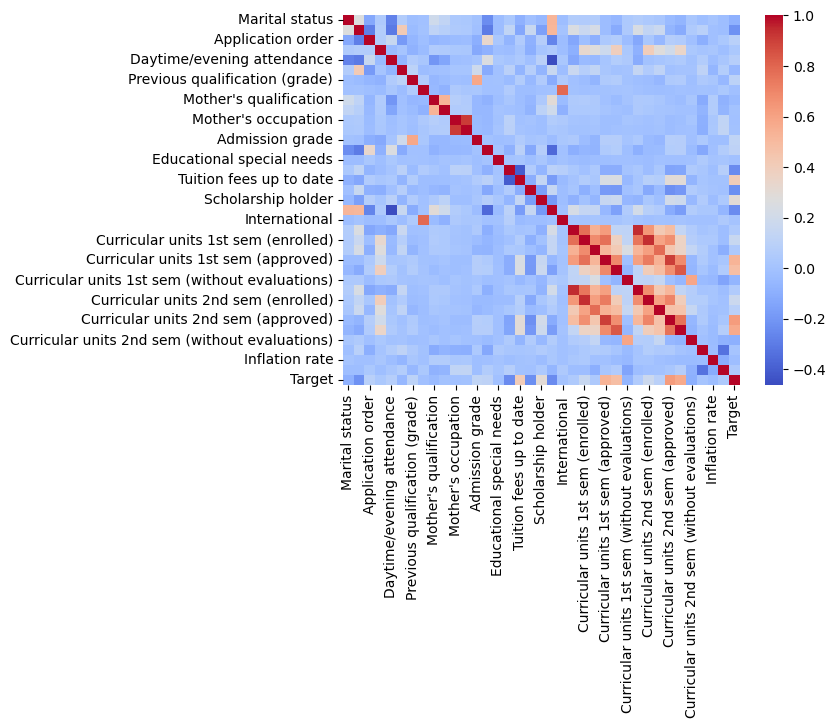

In [65]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

In [66]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract the correlation coefficients for the 'Target' column
target_corr = corr_matrix['Target']

# Print the correlation coefficients
print(target_corr)


Marital status                                   -0.089804
Application mode                                 -0.221747
Application order                                 0.089791
Course                                            0.034219
Daytime/evening attendance                        0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nationality                                      -0.014801
Mother's qualification                           -0.043178
Father's qualification                           -0.001393
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

In [68]:
columns_to_keep = ['Application mode', 'Application order', 'Daytime/evening attendance', 'Previous qualification (grade)', 'Admission grade', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'GDP', 'Target'] 
new_df = df[columns_to_keep]
new_df.head()

,Application mode,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),GDP,Target
0,17,5,1,122.0,127.3,1,0,1,1,0,20,0.000000,0.000000,1.74,0
1,15,1,1,160.0,142.5,1,0,0,1,0,19,14.000000,13.666667,0.79,2
2,1,5,1,122.0,124.8,1,0,0,1,0,19,0.000000,0.000000,1.74,0
3,17,2,1,122.0,119.6,1,0,1,0,0,20,13.428571,12.400000,-3.12,2
4,39,1,0,100.0,141.5,0,0,1,0,0,45,12.333333,13.000000,0.79,2


In [69]:
new_df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

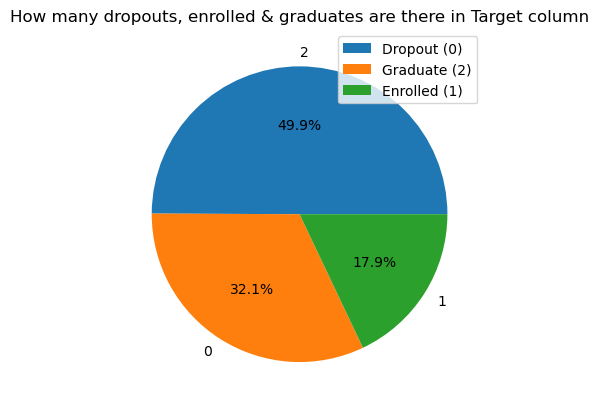

In [70]:
import matplotlib.pyplot as plt

# Get the value counts of the 'Target' column
target_counts = new_df['Target'].value_counts()

# Create a pie chart
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('How many dropouts, enrolled & graduates are there in Target column')

# Add a legend with the target value mappings in the bottom left corner
plt.legend({'Graduate (2)', 'Enrolled (1)', 'Dropout (0)'}, loc='upper right')

# Show the chart
plt.show()

In [79]:
X = new_df.iloc[:,0:14]
Y = new_df.iloc[:,-1]
X

,Application mode,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),GDP
0,17,5,1,122.0,127.3,1,0,1,1,0,20,0.000000,0.000000,1.74
1,15,1,1,160.0,142.5,1,0,0,1,0,19,14.000000,13.666667,0.79
2,1,5,1,122.0,124.8,1,0,0,1,0,19,0.000000,0.000000,1.74
3,17,2,1,122.0,119.6,1,0,1,0,0,20,13.428571,12.400000,-3.12
4,39,1,0,100.0,141.5,0,0,1,0,0,45,12.333333,13.000000,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,125.0,122.2,0,0,1,1,0,19,13.600000,12.666667,-4.06
4420,1,2,1,120.0,119.0,1,1,0,0,0,18,12.000000,11.000000,2.02
4421,1,1,1,154.0,149.5,1,0,1,0,1,30,14.912500,13.500000,0.79
4422,1,1,1,180.0,153.8,1,0,1,0,1,20,13.800000,12.000000,-3.12


In [81]:
Y

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [86]:
# Splitting data into 80% training and 20% testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Checking data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3539, 14)
(885, 14)
(3539,)
(885,)


***Logistic Regression***

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Without CV: ", accuracy_score(Y_test, Y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print("With CV: ", scores.mean())

Without CV:  0.6598870056497175
With CV:  0.6730694131015829


***Random Forest***

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Without CV: ", accuracy_score(Y_test, Y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print("With CV: ", scores.mean())

Without CV:  0.7073446327683616
With CV:  0.7225220467021976
